# Анализ количественных данных

________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [1]:
# Импортируем библиотеку для работы с данными
import pandas as pd
# Импортиурем библиотеку для построения графиков
import matplotlib.pyplot as plt

# Считываем данные в переменную
df = pd.read_csv(r'data\cleardata.csv')

# Преобразуем тип данных
df["Production Date Entered"] = pd.to_datetime(df["Production Date Entered"], format="%m-%Y")

# Выводим получившийся DataFrame
df

,Production Date Entered,Operator,County,Town,Field,Producing Formation,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl","Taxable Gas, Mcf"
0,1997-03-01,benson oil co.,allegany,genesee,ceres,richburg,0,0,0,1,0,0,0,0,0,0
1,1997-01-01,"church, walter l",chautauqua,gerry,lakeshore,medina,0,0,1,0,0,0,0,0,0,0
2,1997-01-01,estate of robert gloor,chautauqua,pomfret,lakeshore,medina,0,0,1,0,0,0,0,0,0,0
3,1997-04-01,"gfs energy, inc.",wyoming,covington,leicester,medina,0,0,5,0,0,0,0,6215,0,5149
4,1997-04-01,"gfs energy, inc.",chautauqua,stockton,lakeshore,medina,0,0,1,0,0,0,0,1414,70,1285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56623,1997-04-01,"gfs energy, inc.",erie,marilla,buffalo creek,medina,0,0,10,0,0,0,0,24041,0,22339
56624,1997-03-01,"cordova resources, inc.",chautauqua,pomfret,lakeshore,medina,0,0,0,1,0,0,0,0,0,0
56625,1997-01-01,"gebhard, paul r.",cattaraugus,conewango,lakeshore,medina,0,0,1,0,0,0,0,250,0,0
56626,1997-01-01,"hebdon, charles f.",cattaraugus,ashford,connoisarauley creek,theresa,0,0,1,0,0,0,0,0,0,0


________________________________________________________________________________________________________________________________________________________________________________________________________________________________

## 1. Расчет основных статистических характеристик данных

In [2]:
# Выводим основные статистические характеристики данных
df.describe()

,Production Date Entered,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl","Taxable Gas, Mcf"
count,56628,56628.000000,56628.000000,56628.000000,56628.000000,56628.000000,56628.000000,56628.000000,5.662800e+04,5.662800e+04,5.662800e+04
mean,1993-01-20 08:48:46.382708224,5.010207,1.337254,3.827612,0.584870,1.331603,0.017447,834.444162,1.832727e+04,6.203459e+03,8.892132e+03
min,1984-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1989-05-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,1994-05-01 00:00:00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.455000e+02,0.000000e+00,0.000000e+00
75%,1996-02-01 00:00:00,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.711000e+03,2.000000e+00,0.000000e+00
max,2002-04-01 00:00:00,1273.000000,360.000000,684.000000,118.000000,1108.000000,226.000000,675589.000000,4.179174e+06,1.759123e+07,4.179174e+06
std,NaN,25.386793,8.405422,12.320766,2.419718,16.926409,1.504256,8484.478858,8.417645e+04,1.767469e+05,6.738799e+04


________________________________________________________________________________________________________________________________________________________________________________________________________________________________

## 2. Графики распределения для основных переменных

In [3]:
# Сохраняем в переменную информацию о нефтяных скважинах
oil_df = df[['Active Oil Wells', 'Inactive Oil Wells']]

# Сохраняем в переменную информацию о газовых скважинах
gas_df = df[['Active Gas Wells', 'Inactive Gas Wells']]

# Сохраняем в переменную информацию о иных скважинах
another_df = df[['Disposal Wells', 'Injection Wells']]

# Сохраняем в переменную информацию о производствах
produced_df = df[['Gas Produced, Mcf', 'Oil Produced, bbl', 'Water produced, bbl']]

- 2.1 Граф распределения для нефтяных скважин

<Axes: >

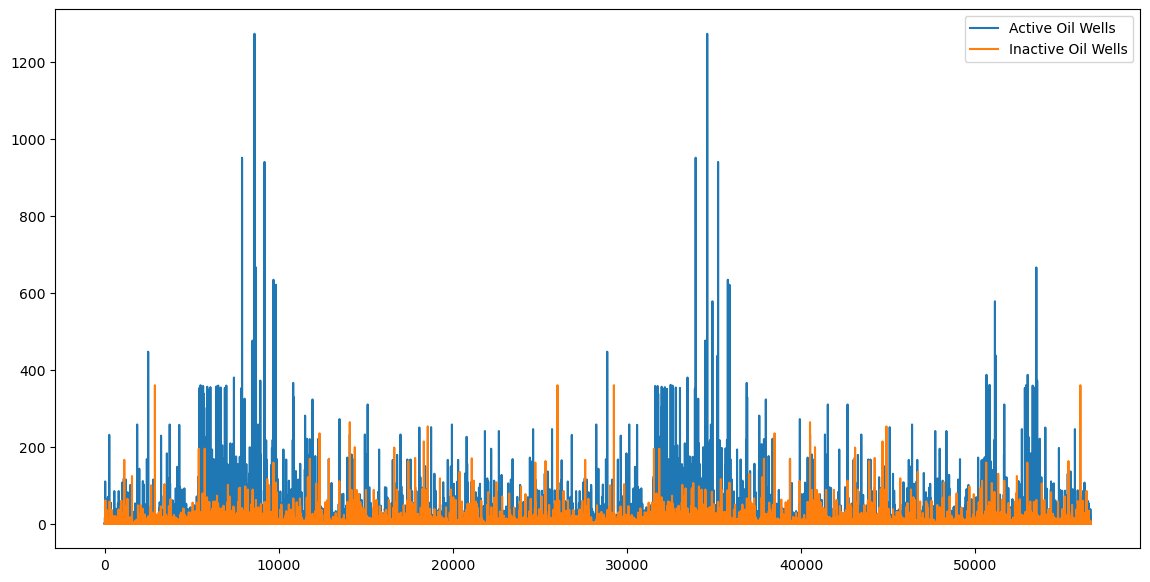

In [4]:
# Создаем граф распределения для нефтяных скважин
oil_df.plot(figsize=(14, 7))

- 2.2 Граф распределения для газовых скважин

<Axes: >

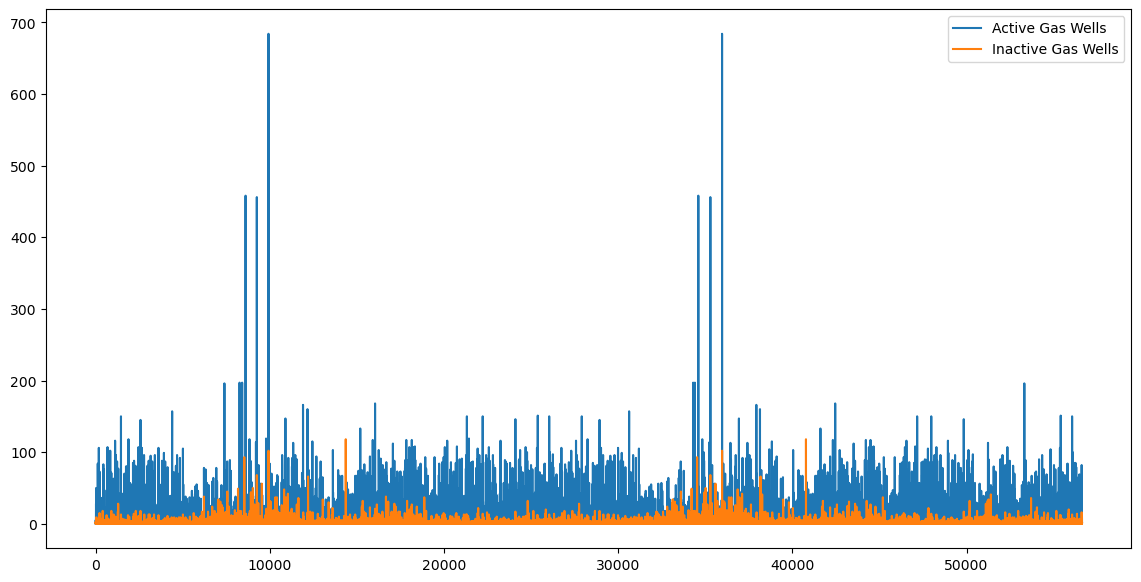

In [5]:
# Создаем граф распределения для газовых скважин
gas_df.plot(figsize=(14, 7))

- 2.3 Граф распределения для других скважин

<Axes: >

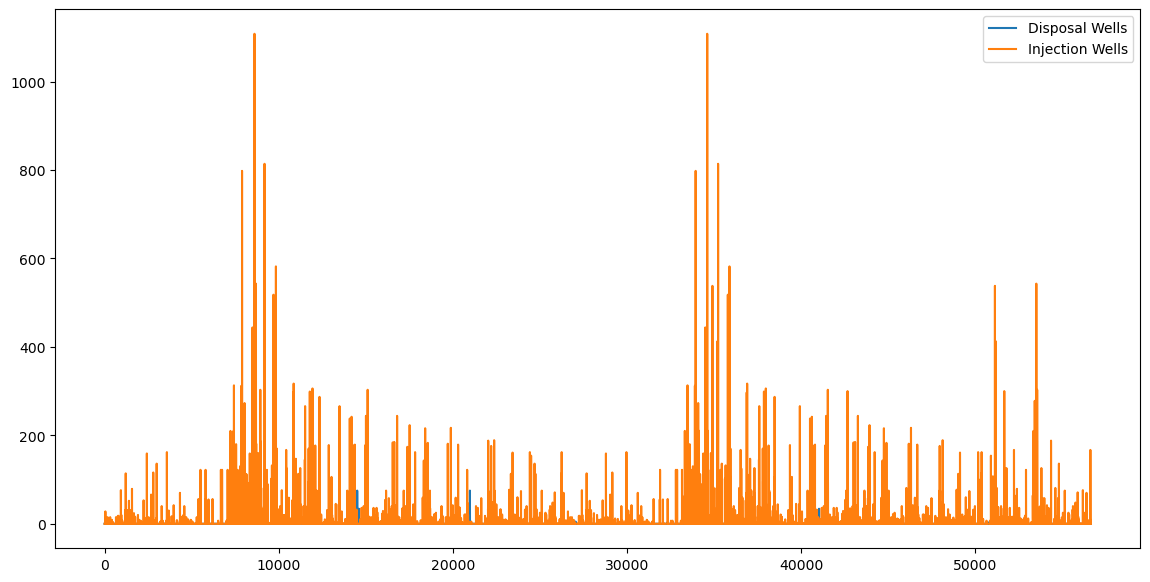

In [6]:
# Создаем граф распределения для иных скважин
another_df.plot(figsize=(14, 7))

- 2.4 Граф распределения для добычи ресурсов

<Axes: >

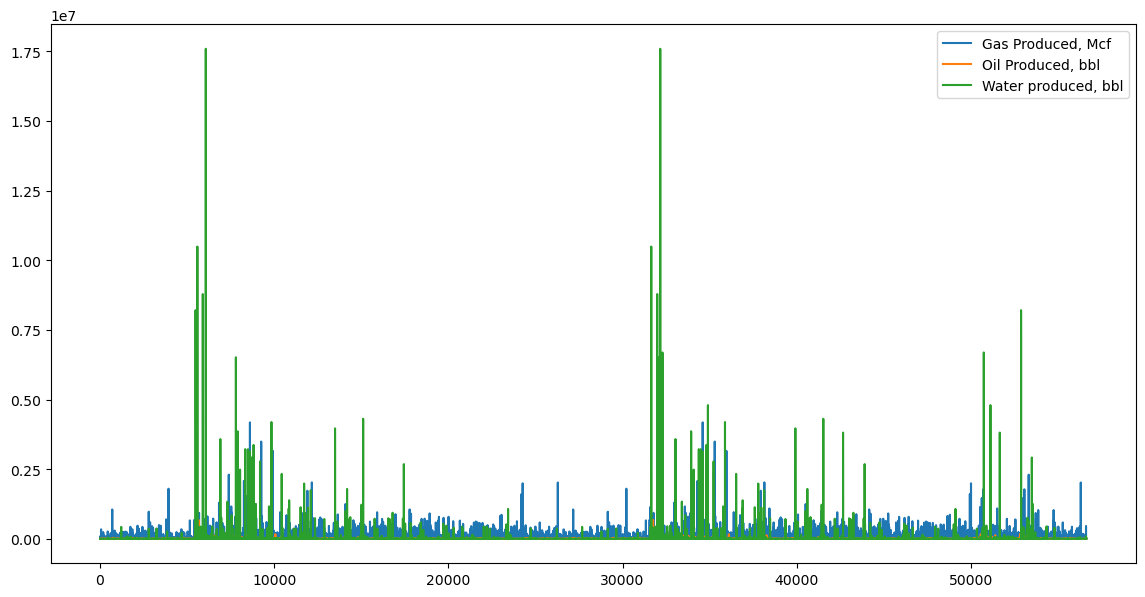

In [7]:
# Создаем граф распределения для информации о производстве
produced_df.plot(figsize=(14, 7))

________________________________________________________________________________________________________________________________________________________________________________________________________________________________

## 3. Корреляционный анализ между переменными

In [8]:
# Импортиурем из библиотеки функцию для корреляционного анализа Спирмена
from scipy.stats import spearmanr

# Выводим корреляционные анализы
print('Корреляционные анализы для:')
print('County и Gas Produced, Mcf:', spearmanr(df['County'], df['Gas Produced, Mcf']))
print('County и Oil Produced, bbl:', spearmanr(df['County'], df['Oil Produced, bbl']))
print('County и Water produced, bbl:', spearmanr(df['County'], df['Water produced, bbl']))
print('Active Oil Wells и Oil Produced, bbl:', spearmanr(df['Active Oil Wells'], df['Oil Produced, bbl']))
print('Active Gas Wells и Gas Produced, Mcf:', spearmanr(df['Active Gas Wells'], df['Gas Produced, Mcf']))
print('Disposal Wells и Gas Produced, Mcf:', spearmanr(df['Disposal Wells'], df['Gas Produced, Mcf']))
print('Injection Wells и Gas Produced, Mcf:', spearmanr(df['Injection Wells'], df['Gas Produced, Mcf']))
print('Disposal Wells и Oil Produced, bbl:', spearmanr(df['Disposal Wells'], df['Oil Produced, bbl']))
print('Injection Wells и Oil Produced, bbl:', spearmanr(df['Injection Wells'], df['Oil Produced, bbl']))

Корреляционные анализы для:
County и Gas Produced, Mcf: SignificanceResult(statistic=0.3073995426244054, pvalue=0.0)
County и Oil Produced, bbl: SignificanceResult(statistic=-0.5060570614311464, pvalue=0.0)
County и Water produced, bbl: SignificanceResult(statistic=-0.12633750174583158, pvalue=3.7925696226657665e-200)
Active Oil Wells и Oil Produced, bbl: SignificanceResult(statistic=0.9549015573645253, pvalue=0.0)
Active Gas Wells и Gas Produced, Mcf: SignificanceResult(statistic=0.8248794455025149, pvalue=0.0)
Disposal Wells и Gas Produced, Mcf: SignificanceResult(statistic=-0.007797399640881755, pvalue=0.06352396846684161)
Injection Wells и Gas Produced, Mcf: SignificanceResult(statistic=-0.12038465263177994, pvalue=8.679301988704165e-182)
Disposal Wells и Oil Produced, bbl: SignificanceResult(statistic=0.004682539465113025, pvalue=0.2651640179014247)
Injection Wells и Oil Produced, bbl: SignificanceResult(statistic=0.2907214308661077, pvalue=0.0)


________________________________________________________________________________________________________________________________________________________________________________________________________________________________

## 4. Кластерный анализ данных

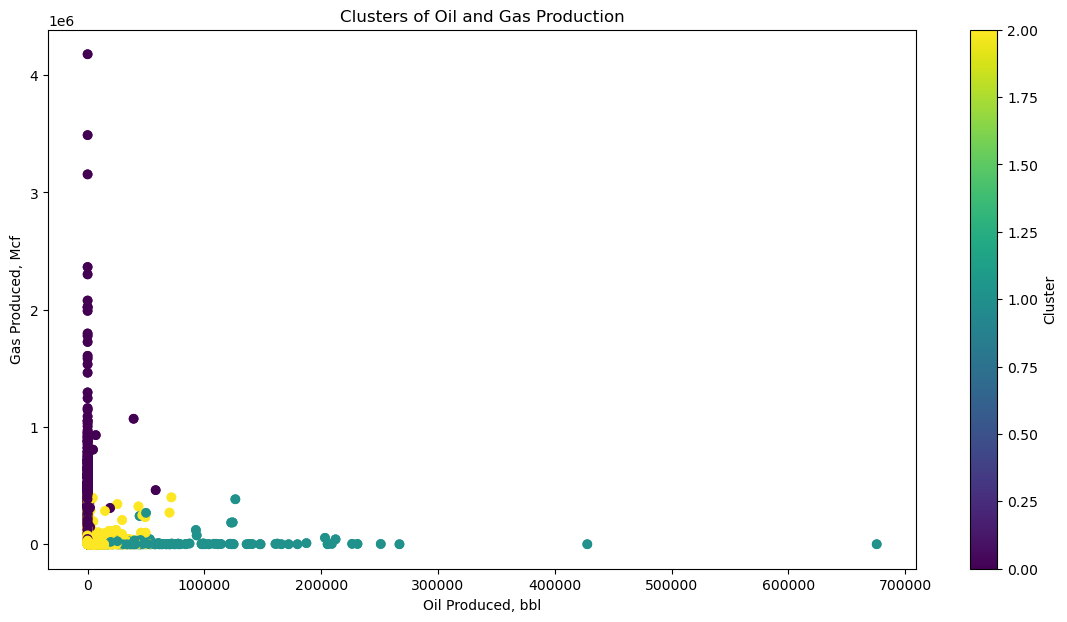

In [12]:
# Из библиотеки импортиурем модуль для маштабирования данных
from sklearn.preprocessing import StandardScaler
# Из библиотеки импортиурем модуль для кластеризации данных
from sklearn.cluster import KMeans

# Выбор только числовых столбцов для кластеризации
df_numeric = df[["Active Oil Wells", "Inactive Oil Wells", "Active Gas Wells", "Inactive Gas Wells", "Oil Produced, bbl", "Gas Produced, Mcf", "Water produced, bbl"]]

# Сохраняем в переменную функцию масштабирования
scaler = StandardScaler()
# Масштабируем данные
df_scaled = scaler.fit_transform(df_numeric)

# В переменную сохраняем функцию кластеризации
kmeans = KMeans(n_clusters=3, random_state=0)
# Кластеризуем данные
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Задаем размер графу 
plt.figure(figsize=(14, 7))

# Использование Scatter для отображения каждого элемента кластера
scatter = plt.scatter(df["Oil Produced, bbl"], df["Gas Produced, Mcf"], c=df["Cluster"], cmap='viridis', marker='o')
# Задаем название по X
plt.xlabel("Oil Produced, bbl")
# Задаем название по Y
plt.ylabel("Gas Produced, Mcf")
# Задаем заголовок
plt.title("Clusters of Oil and Gas Production")
# Показываем граф
plt.show()

________________________________________________________________________________________________________________________________________________________________________________________________________________________________

## 5. Математический анализ данных

In [ ]:
# Установка даты в качестве индекса
df.set_index("Production Date Entered", inplace=True)

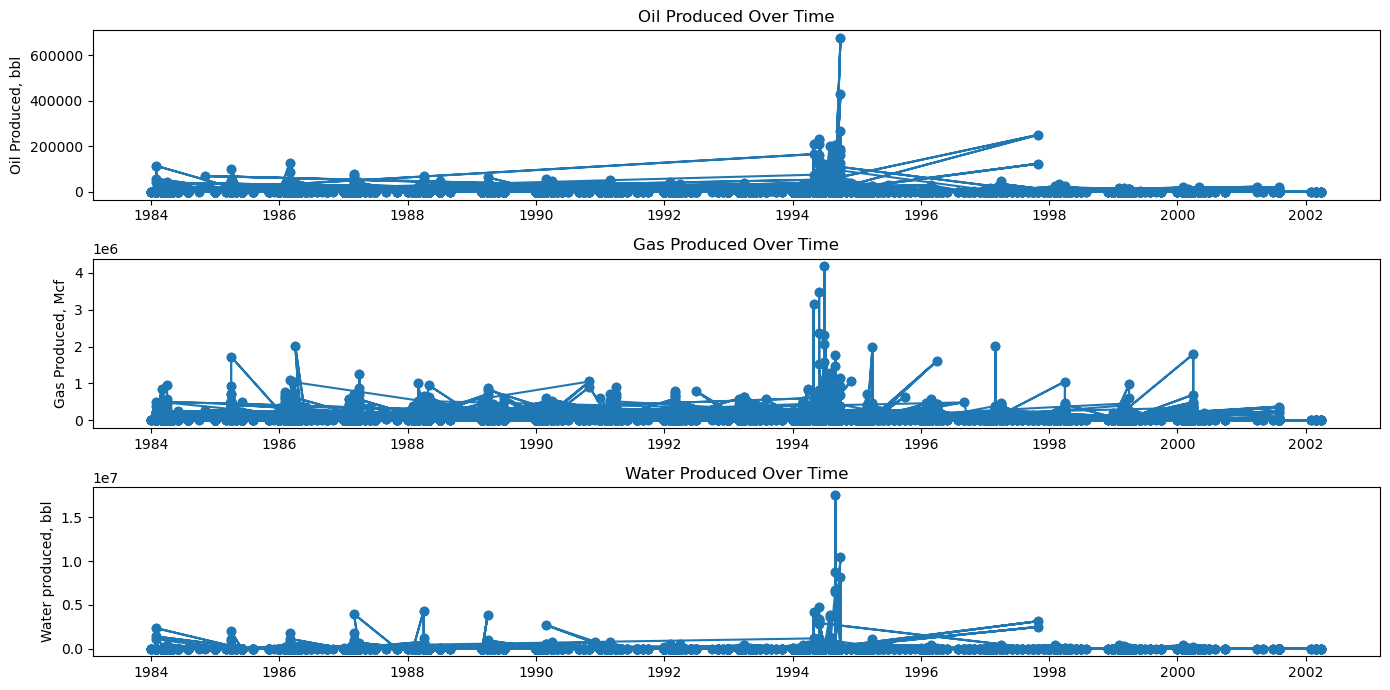

In [10]:
# Задаем размер графикам
plt.figure(figsize=(14, 7))

# Добавляем в основное окно дополнительное
plt.subplot(3, 1, 1)
# Создаем график для добычи нефти
plt.plot(df.index, df['Oil Produced, bbl'], marker='o')
# Задаем название графику
plt.title("Oil Produced Over Time")
# Задаем название по Y
plt.ylabel('Oil Produced, bbl')

# Добавляем в основное окно дополнительное
plt.subplot(3, 1, 2)
# Создаем график для добычи газа
plt.plot(df.index, df['Gas Produced, Mcf'], marker='o')
# Задаем название графику
plt.title("Gas Produced Over Time")
# Задаем название по Y
plt.ylabel('Gas Produced, Mcf')

# Добавляем в основное окно дополнительное
plt.subplot(3, 1, 3)
# Создаем график для добычи воды
plt.plot(df.index, df['Water produced, bbl'], marker='o')
# Задаем название графику
plt.title("Water Produced Over Time")
# Задаем название по Y
plt.ylabel('Water Produced, bbl')


# Настравиаем размещеение элементов на графе
plt.tight_layout()
# Показываем графики 
plt.show()

________________________________________________________________________________________________________________________________________________________________________________________________________________________________